# <center> PDL Lab14: Convolutional Neural Network Exploration </center>

### 205229103                                                                                                                      


### Arzoo Sah

**Configuaration : B**


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import to_categorical
import numpy as np
from keras.layers import Conv2D, MaxPooling2D
import random
import matplotlib.pyplot as plt

In [4]:
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


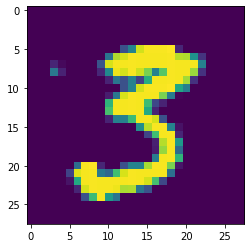

In [5]:
plt.imshow(x_train[49])
plt.show()

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [7]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [8]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

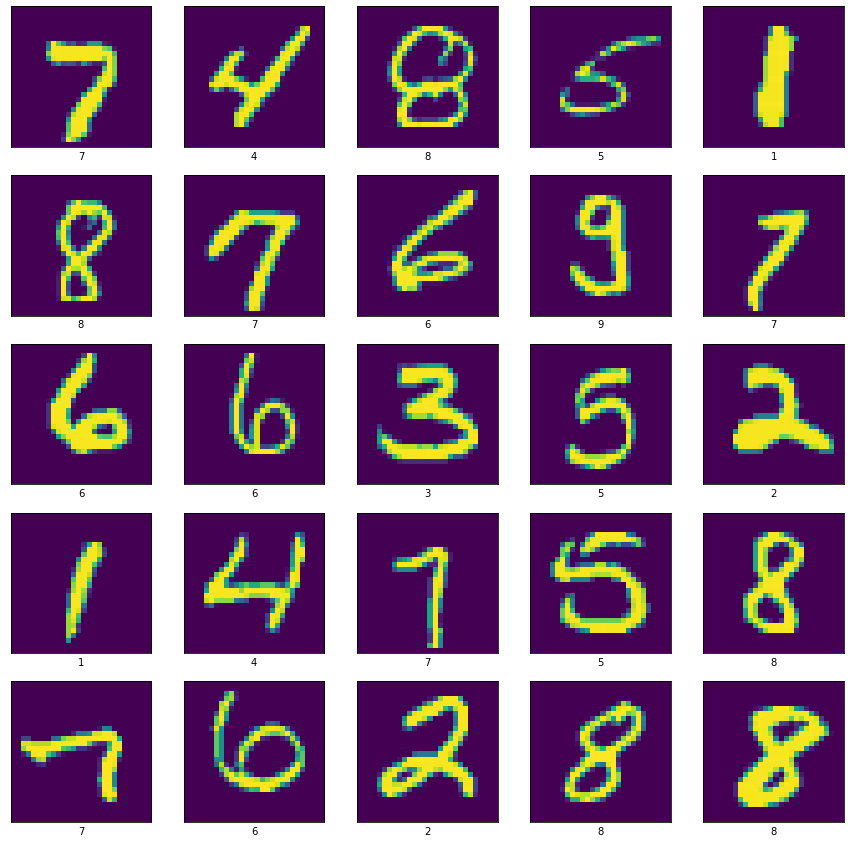

In [9]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    rand_no = random.randint(0,len(x_train))     
    plt.imshow(x_train[rand_no])
    plt.xlabel(class_names[np.argmax(y_train[rand_no])])

In [10]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

## 1.number of filters

**32 filters**


In [9]:
INPUT_SHAPE = (28,28,1)

model = Sequential()
# 32 filters 
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(2,2),activation='relu', input_shape=INPUT_SHAPE))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               2769408   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 2,774,858
Trainable params: 2,774,858
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
history=model.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2,validation_split=0.2)

Epoch 1/5
1500/1500 - 35s - loss: 0.1685 - accuracy: 0.9490 - val_loss: 0.0747 - val_accuracy: 0.9760
Epoch 2/5
1500/1500 - 5s - loss: 0.0498 - accuracy: 0.9846 - val_loss: 0.0586 - val_accuracy: 0.9817
Epoch 3/5
1500/1500 - 6s - loss: 0.0259 - accuracy: 0.9916 - val_loss: 0.0601 - val_accuracy: 0.9814
Epoch 4/5
1500/1500 - 6s - loss: 0.0133 - accuracy: 0.9956 - val_loss: 0.0701 - val_accuracy: 0.9818
Epoch 5/5
1500/1500 - 6s - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.0646 - val_accuracy: 0.9833


In [13]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0492 - accuracy: 0.9861


[0.04922684282064438, 0.9861000180244446]

**4 filters**

In [14]:
INPUT_SHAPE = (28,28,1)

model1 = Sequential()
# 4 filters 
model1.add(Conv2D(filters=4, kernel_size=(3,3), strides=(2,2),activation='relu', input_shape=INPUT_SHAPE))

model1.add(Flatten())

model1.add(Dense(512, activation='relu'))

model1.add(Dense(10, activation='softmax'))

In [15]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 13, 13, 4)         40        
_________________________________________________________________
flatten_1 (Flatten)          (None, 676)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               346624    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 351,794
Trainable params: 351,794
Non-trainable params: 0
_________________________________________________________________


In [16]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
history1=model1.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2,validation_split=0.2)

Epoch 1/5
1500/1500 - 5s - loss: 0.2319 - accuracy: 0.9323 - val_loss: 0.1017 - val_accuracy: 0.9707
Epoch 2/5
1500/1500 - 4s - loss: 0.0817 - accuracy: 0.9752 - val_loss: 0.0810 - val_accuracy: 0.9761
Epoch 3/5
1500/1500 - 5s - loss: 0.0482 - accuracy: 0.9856 - val_loss: 0.0789 - val_accuracy: 0.9772
Epoch 4/5
1500/1500 - 4s - loss: 0.0326 - accuracy: 0.9895 - val_loss: 0.0705 - val_accuracy: 0.9810
Epoch 5/5
1500/1500 - 5s - loss: 0.0222 - accuracy: 0.9926 - val_loss: 0.0742 - val_accuracy: 0.9812


In [18]:
model1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0663 - accuracy: 0.9807


[0.06628095358610153, 0.9807000160217285]

**128 filters**

In [19]:
INPUT_SHAPE = (28,28,1)

model2 = Sequential()
# 128 filters 
model2.add(Conv2D(filters=128, kernel_size=(3,3), strides=(2,2),activation='relu', input_shape=INPUT_SHAPE))

model2.add(Flatten())

model2.add(Dense(512, activation='relu'))

model2.add(Dense(10, activation='softmax'))

In [20]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 13, 13, 128)       1280      
_________________________________________________________________
flatten_2 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               11076096  
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 11,082,506
Trainable params: 11,082,506
Non-trainable params: 0
_________________________________________________________________


In [21]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
history2=model2.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2,validation_split=0.2)

Epoch 1/5
1500/1500 - 12s - loss: 0.1516 - accuracy: 0.9532 - val_loss: 0.0779 - val_accuracy: 0.9780
Epoch 2/5
1500/1500 - 12s - loss: 0.0443 - accuracy: 0.9865 - val_loss: 0.0563 - val_accuracy: 0.9828
Epoch 3/5
1500/1500 - 11s - loss: 0.0209 - accuracy: 0.9931 - val_loss: 0.0831 - val_accuracy: 0.9781
Epoch 4/5
1500/1500 - 11s - loss: 0.0132 - accuracy: 0.9958 - val_loss: 0.0674 - val_accuracy: 0.9823
Epoch 5/5
1500/1500 - 12s - loss: 0.0091 - accuracy: 0.9971 - val_loss: 0.0932 - val_accuracy: 0.9793


In [23]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0748 - accuracy: 0.9816


[0.07478415966033936, 0.9815999865531921]

**512 filters**

In [24]:
INPUT_SHAPE = (28,28,1)

model3 = Sequential()
# 512 filters 
model3.add(Conv2D(filters=512, kernel_size=(3,3), strides=(2,2),activation='relu', input_shape=INPUT_SHAPE))

model3.add(Flatten())

model3.add(Dense(512, activation='relu'))

model3.add(Dense(10, activation='softmax'))

In [25]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 13, 13, 512)       5120      
_________________________________________________________________
flatten_3 (Flatten)          (None, 86528)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               44302848  
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 44,313,098
Trainable params: 44,313,098
Non-trainable params: 0
_________________________________________________________________


In [26]:
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
history3=model3.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2,validation_split=0.2)


Epoch 1/5
1500/1500 - 39s - loss: 0.1379 - accuracy: 0.9584 - val_loss: 0.0696 - val_accuracy: 0.9785
Epoch 2/5
1500/1500 - 39s - loss: 0.0394 - accuracy: 0.9872 - val_loss: 0.0611 - val_accuracy: 0.9822
Epoch 3/5
1500/1500 - 39s - loss: 0.0196 - accuracy: 0.9935 - val_loss: 0.0797 - val_accuracy: 0.9803
Epoch 4/5
1500/1500 - 39s - loss: 0.0124 - accuracy: 0.9962 - val_loss: 0.0841 - val_accuracy: 0.9802
Epoch 5/5
1500/1500 - 39s - loss: 0.0131 - accuracy: 0.9956 - val_loss: 0.0947 - val_accuracy: 0.9817


In [28]:
model3.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0771 - accuracy: 0.9825


[0.0771292895078659, 0.9825000166893005]

## 2.Number of layers

**2 conv layers**

In [29]:
INPUT_SHAPE = (28,28,1)

model4 = Sequential()

model4.add(Conv2D(filters=32, kernel_size=(3,3), strides=(2,2),activation='relu', input_shape=INPUT_SHAPE))

model4.add(Conv2D(filters=32, kernel_size=(3,3), strides=(2,2),activation='relu', input_shape=INPUT_SHAPE))

model4.add(Flatten())

model4.add(Dense(128, activation='relu'))

model4.add(Dense(10, activation='softmax'))

In [30]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
flatten_4 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               147584    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 158,442
Trainable params: 158,442
Non-trainable params: 0
_________________________________________________________________


In [31]:
model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
history4=model4.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2,validation_split=0.2)

Epoch 1/5
1500/1500 - 5s - loss: 0.2005 - accuracy: 0.9407 - val_loss: 0.0847 - val_accuracy: 0.9742
Epoch 2/5
1500/1500 - 5s - loss: 0.0648 - accuracy: 0.9798 - val_loss: 0.0560 - val_accuracy: 0.9832
Epoch 3/5
1500/1500 - 5s - loss: 0.0411 - accuracy: 0.9871 - val_loss: 0.0619 - val_accuracy: 0.9812
Epoch 4/5
1500/1500 - 5s - loss: 0.0281 - accuracy: 0.9908 - val_loss: 0.0571 - val_accuracy: 0.9833
Epoch 5/5
1500/1500 - 4s - loss: 0.0222 - accuracy: 0.9924 - val_loss: 0.0557 - val_accuracy: 0.9855


In [33]:
model4.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0429 - accuracy: 0.9868


[0.04286355525255203, 0.9868000149726868]

**3 conv layers**

In [34]:
INPUT_SHAPE = (28,28,1)

model5 = Sequential()

model5.add(Conv2D(filters=32, kernel_size=(3,3), strides=(2,2),activation='relu', input_shape=INPUT_SHAPE))

model5.add(Conv2D(filters=32, kernel_size=(3,3), strides=(2,2),activation='relu', input_shape=INPUT_SHAPE))

model5.add(Conv2D(filters=32, kernel_size=(3,3), strides=(2,2),activation='relu', input_shape=INPUT_SHAPE))

model5.add(Flatten())

model5.add(Dense(128, activation='relu'))

model5.add(Dense(10, activation='softmax'))

In [35]:
model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 2, 32)          9248      
_________________________________________________________________
flatten_5 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 36,618
Trainable params: 36,618
Non-trainable params: 0
__________________________________________________

In [36]:
model5.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
history5 = model5.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2,validation_split=0.2)

Epoch 1/5
1500/1500 - 6s - loss: 0.2705 - accuracy: 0.9176 - val_loss: 0.1167 - val_accuracy: 0.9638
Epoch 2/5
1500/1500 - 6s - loss: 0.0933 - accuracy: 0.9704 - val_loss: 0.0899 - val_accuracy: 0.9733
Epoch 3/5
1500/1500 - 6s - loss: 0.0651 - accuracy: 0.9796 - val_loss: 0.0742 - val_accuracy: 0.9776
Epoch 4/5
1500/1500 - 6s - loss: 0.0519 - accuracy: 0.9829 - val_loss: 0.0688 - val_accuracy: 0.9785
Epoch 5/5
1500/1500 - 5s - loss: 0.0409 - accuracy: 0.9865 - val_loss: 0.0702 - val_accuracy: 0.9803


In [38]:
model5.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0601 - accuracy: 0.9817


[0.06008686497807503, 0.9817000031471252]

### 3.Size of filters

**3x3**

In [39]:
INPUT_SHAPE = (28,28,1)

model6 = Sequential()

model6.add(Conv2D(filters=16, kernel_size=(3,3), strides=(2,2),activation='relu', input_shape=INPUT_SHAPE))

model6.add(Conv2D(filters=16, kernel_size=(3,3), strides=(2,2),activation='relu', input_shape=INPUT_SHAPE))

model6.add(Flatten())

model6.add(Dense(128, activation='relu'))

model6.add(Dense(10, activation='softmax'))

In [40]:
model6.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 13, 13, 16)        160       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 6, 6, 16)          2320      
_________________________________________________________________
flatten_6 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               73856     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 77,626
Trainable params: 77,626
Non-trainable params: 0
_________________________________________________________________


In [41]:
model6.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [42]:
history6 = model6.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2,validation_split=0.2)

Epoch 1/5
1500/1500 - 5s - loss: 0.2446 - accuracy: 0.9280 - val_loss: 0.1196 - val_accuracy: 0.9649
Epoch 2/5
1500/1500 - 5s - loss: 0.0821 - accuracy: 0.9754 - val_loss: 0.0765 - val_accuracy: 0.9784
Epoch 3/5
1500/1500 - 5s - loss: 0.0549 - accuracy: 0.9828 - val_loss: 0.0624 - val_accuracy: 0.9811
Epoch 4/5
1500/1500 - 5s - loss: 0.0410 - accuracy: 0.9869 - val_loss: 0.0711 - val_accuracy: 0.9786
Epoch 5/5
1500/1500 - 5s - loss: 0.0320 - accuracy: 0.9894 - val_loss: 0.0693 - val_accuracy: 0.9812


In [43]:
model6.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0655 - accuracy: 0.9814


[0.06554975360631943, 0.9814000129699707]

**5x5**

In [44]:
INPUT_SHAPE = (28,28,1)

model7 = Sequential()

model7.add(Conv2D(filters=16, kernel_size=(5,5), strides=(2,2),activation='relu', input_shape=INPUT_SHAPE))

model7.add(Conv2D(filters=16, kernel_size=(5,5), strides=(2,2),activation='relu', input_shape=INPUT_SHAPE))

model7.add(Flatten())

model7.add(Dense(128, activation='relu'))

model7.add(Dense(10, activation='softmax'))

In [45]:
model7.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 12, 12, 16)        416       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 16)          6416      
_________________________________________________________________
flatten_7 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 41,018
Trainable params: 41,018
Non-trainable params: 0
_________________________________________________________________


In [46]:
model7.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [47]:
history7 = model7.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2,validation_split=0.2)

Epoch 1/5
1500/1500 - 6s - loss: 0.2514 - accuracy: 0.9231 - val_loss: 0.1009 - val_accuracy: 0.9698
Epoch 2/5
1500/1500 - 5s - loss: 0.0868 - accuracy: 0.9726 - val_loss: 0.0854 - val_accuracy: 0.9751
Epoch 3/5
1500/1500 - 5s - loss: 0.0597 - accuracy: 0.9818 - val_loss: 0.0639 - val_accuracy: 0.9818
Epoch 4/5
1500/1500 - 4s - loss: 0.0451 - accuracy: 0.9856 - val_loss: 0.0688 - val_accuracy: 0.9798
Epoch 5/5
1500/1500 - 5s - loss: 0.0350 - accuracy: 0.9891 - val_loss: 0.0606 - val_accuracy: 0.9833


In [48]:
model7.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0516 - accuracy: 0.9844


[0.05160897225141525, 0.9843999743461609]

**7x7**

In [49]:
INPUT_SHAPE = (28,28,1)

model8 = Sequential()

model8.add(Conv2D(filters=16, kernel_size=(7,7), strides=(2,2),activation='relu', input_shape=INPUT_SHAPE))

model8.add(Conv2D(filters=16, kernel_size=(7,7), strides=(2,2),activation='relu', input_shape=INPUT_SHAPE))

model8.add(Flatten())

model8.add(Dense(128, activation='relu'))

model8.add(Dense(10, activation='softmax'))

In [50]:
model8.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 11, 11, 16)        800       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 16)          12560     
_________________________________________________________________
flatten_8 (Flatten)          (None, 144)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               18560     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 33,210
Trainable params: 33,210
Non-trainable params: 0
_________________________________________________________________


In [51]:
model8.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [52]:
history8 = model8.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2,validation_split=0.2)

Epoch 1/5
1500/1500 - 5s - loss: 0.2385 - accuracy: 0.9280 - val_loss: 0.1162 - val_accuracy: 0.9637
Epoch 2/5
1500/1500 - 5s - loss: 0.0796 - accuracy: 0.9754 - val_loss: 0.0940 - val_accuracy: 0.9716
Epoch 3/5
1500/1500 - 5s - loss: 0.0569 - accuracy: 0.9824 - val_loss: 0.0598 - val_accuracy: 0.9835
Epoch 4/5
1500/1500 - 5s - loss: 0.0446 - accuracy: 0.9861 - val_loss: 0.0651 - val_accuracy: 0.9827
Epoch 5/5
1500/1500 - 5s - loss: 0.0353 - accuracy: 0.9885 - val_loss: 0.0576 - val_accuracy: 0.9833


In [53]:
model8.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0425 - accuracy: 0.9878


[0.04248419031500816, 0.9878000020980835]

### 4.Activation Function

**sigmoid function**

In [54]:
INPUT_SHAPE = (28,28,1)

model9 = Sequential()

model9.add(Conv2D(filters=16, kernel_size=(3,3), strides=(2,2),activation='sigmoid', input_shape=INPUT_SHAPE))

model9.add(Conv2D(filters=16, kernel_size=(3,3), strides=(2,2),activation='sigmoid', input_shape=INPUT_SHAPE))

model9.add(Flatten())

model9.add(Dense(128, activation='sigmoid'))

model9.add(Dense(10, activation='softmax'))

In [55]:
model9.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 13, 13, 16)        160       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 6, 6, 16)          2320      
_________________________________________________________________
flatten_9 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               73856     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 77,626
Trainable params: 77,626
Non-trainable params: 0
_________________________________________________________________


In [56]:
model9.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [57]:
history9 = model9.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2,validation_split=0.2)

Epoch 1/5
1500/1500 - 6s - loss: 0.8431 - accuracy: 0.7230 - val_loss: 0.2711 - val_accuracy: 0.9197
Epoch 2/5
1500/1500 - 5s - loss: 0.2480 - accuracy: 0.9255 - val_loss: 0.1953 - val_accuracy: 0.9417
Epoch 3/5
1500/1500 - 5s - loss: 0.1766 - accuracy: 0.9468 - val_loss: 0.1526 - val_accuracy: 0.9542
Epoch 4/5
1500/1500 - 5s - loss: 0.1343 - accuracy: 0.9599 - val_loss: 0.1227 - val_accuracy: 0.9635
Epoch 5/5
1500/1500 - 5s - loss: 0.1064 - accuracy: 0.9688 - val_loss: 0.1027 - val_accuracy: 0.9703


In [58]:
model9.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0993 - accuracy: 0.9689


[0.09925555437803268, 0.9689000248908997]

**tanh function**

In [59]:
INPUT_SHAPE = (28,28,1)

model10 = Sequential()

model10.add(Conv2D(filters=16, kernel_size=(3,3), strides=(2,2),activation='tanh', input_shape=INPUT_SHAPE))

model10.add(Conv2D(filters=16, kernel_size=(3,3), strides=(2,2),activation='tanh', input_shape=INPUT_SHAPE))

model10.add(Flatten())

model10.add(Dense(128, activation='tanh'))

model10.add(Dense(10, activation='softmax'))

In [60]:
model10.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 13, 13, 16)        160       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 6, 6, 16)          2320      
_________________________________________________________________
flatten_10 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               73856     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 77,626
Trainable params: 77,626
Non-trainable params: 0
_________________________________________________________________


In [61]:
model10.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [62]:
history10 = model10.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2,validation_split=0.2)

Epoch 1/5
1500/1500 - 6s - loss: 0.2589 - accuracy: 0.9233 - val_loss: 0.1325 - val_accuracy: 0.9620
Epoch 2/5
1500/1500 - 5s - loss: 0.1007 - accuracy: 0.9699 - val_loss: 0.0936 - val_accuracy: 0.9730
Epoch 3/5
1500/1500 - 5s - loss: 0.0649 - accuracy: 0.9809 - val_loss: 0.0846 - val_accuracy: 0.9737
Epoch 4/5
1500/1500 - 5s - loss: 0.0461 - accuracy: 0.9863 - val_loss: 0.0686 - val_accuracy: 0.9799
Epoch 5/5
1500/1500 - 5s - loss: 0.0343 - accuracy: 0.9898 - val_loss: 0.0682 - val_accuracy: 0.9801


In [63]:
model10.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0607 - accuracy: 0.9815


[0.060697730630636215, 0.9815000295639038]

### 5.Filter Size Combinations

**layer 1:3x3 layer 2:5x5** 

In [64]:
INPUT_SHAPE = (28,28,1)

model11 = Sequential()

model11.add(Conv2D(filters=16, kernel_size=(3,3), strides=(2,2),activation='relu', input_shape=INPUT_SHAPE))

model11.add(Conv2D(filters=16, kernel_size=(5,5), strides=(2,2),activation='relu', input_shape=INPUT_SHAPE))

model11.add(Flatten())

model11.add(Dense(128, activation='relu'))

model11.add(Dense(10, activation='softmax'))

In [65]:
model11.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 13, 13, 16)        160       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 5, 5, 16)          6416      
_________________________________________________________________
flatten_11 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               51328     
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1290      
Total params: 59,194
Trainable params: 59,194
Non-trainable params: 0
_________________________________________________________________


In [66]:
model11.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [67]:
history11 = model11.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2,validation_split=0.2)

Epoch 1/5
1500/1500 - 6s - loss: 0.2274 - accuracy: 0.9315 - val_loss: 0.0893 - val_accuracy: 0.9733
Epoch 2/5
1500/1500 - 5s - loss: 0.0747 - accuracy: 0.9770 - val_loss: 0.0696 - val_accuracy: 0.9794
Epoch 3/5
1500/1500 - 5s - loss: 0.0511 - accuracy: 0.9841 - val_loss: 0.0608 - val_accuracy: 0.9810
Epoch 4/5
1500/1500 - 5s - loss: 0.0378 - accuracy: 0.9881 - val_loss: 0.0561 - val_accuracy: 0.9840
Epoch 5/5
1500/1500 - 5s - loss: 0.0298 - accuracy: 0.9907 - val_loss: 0.0495 - val_accuracy: 0.9851


In [68]:
model11.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0415 - accuracy: 0.9876


[0.041460417211055756, 0.9876000285148621]

**layer 1:5x5 layer 2:7x7**

In [69]:
INPUT_SHAPE = (28,28,1)

model12 = Sequential()

model12.add(Conv2D(filters=16, kernel_size=(5,5), strides=(2,2),activation='relu', input_shape=INPUT_SHAPE))

model12.add(Conv2D(filters=16, kernel_size=(7,7), strides=(2,2),activation='relu', input_shape=INPUT_SHAPE))

model12.add(Flatten())

model12.add(Dense(128, activation='relu'))

model12.add(Dense(10, activation='softmax'))

In [70]:
model12.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 12, 12, 16)        416       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 3, 3, 16)          12560     
_________________________________________________________________
flatten_12 (Flatten)         (None, 144)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               18560     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total params: 32,826
Trainable params: 32,826
Non-trainable params: 0
_________________________________________________________________


In [71]:
model12.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [72]:
history12 = model12.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2,validation_split=0.2)

Epoch 1/5
1500/1500 - 5s - loss: 0.2635 - accuracy: 0.9206 - val_loss: 0.1249 - val_accuracy: 0.9627
Epoch 2/5
1500/1500 - 5s - loss: 0.0961 - accuracy: 0.9704 - val_loss: 0.0762 - val_accuracy: 0.9775
Epoch 3/5
1500/1500 - 5s - loss: 0.0656 - accuracy: 0.9794 - val_loss: 0.0705 - val_accuracy: 0.9798
Epoch 4/5
1500/1500 - 5s - loss: 0.0496 - accuracy: 0.9842 - val_loss: 0.0669 - val_accuracy: 0.9803
Epoch 5/5
1500/1500 - 5s - loss: 0.0387 - accuracy: 0.9880 - val_loss: 0.0611 - val_accuracy: 0.9831


In [73]:
model12.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0504 - accuracy: 0.9842


[0.05036479979753494, 0.9842000007629395]

### 6.Layer-Filter combinations

**configuration B**

In [75]:
INPUT_SHAPE = (28,28,1)

modelB=Sequential()

modelB.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu',input_shape=INPUT_SHAPE))

modelB.add(Flatten())

modelB.add(Dense(64, activation='relu'))
modelB.add(Dense(128, activation='relu'))
modelB.add(Dense(256, activation='relu'))
modelB.add(Dense(128, activation='relu'))
modelB.add(Dense(64, activation='relu'))

modelB.add(Dense(10, activation='softmax'))

In [76]:
modelB.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
flatten_13 (Flatten)         (None, 10816)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                692288    
_________________________________________________________________
dense_27 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_28 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_29 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_30 (Dense)             (None, 64)              

In [77]:
modelB.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [78]:
historyB = modelB.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2,validation_split=0.2)

Epoch 1/5
1500/1500 - 6s - loss: 0.2380 - accuracy: 0.9273 - val_loss: 0.1018 - val_accuracy: 0.9709
Epoch 2/5
1500/1500 - 5s - loss: 0.0761 - accuracy: 0.9769 - val_loss: 0.0883 - val_accuracy: 0.9742
Epoch 3/5
1500/1500 - 5s - loss: 0.0500 - accuracy: 0.9846 - val_loss: 0.0708 - val_accuracy: 0.9803
Epoch 4/5
1500/1500 - 5s - loss: 0.0350 - accuracy: 0.9896 - val_loss: 0.0897 - val_accuracy: 0.9782
Epoch 5/5
1500/1500 - 5s - loss: 0.0296 - accuracy: 0.9913 - val_loss: 0.0783 - val_accuracy: 0.9812


In [79]:
modelB.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0786 - accuracy: 0.9788


[0.07864059507846832, 0.9787999987602234]

### 7.Influence of Striding

**stride = 2**

**5x5 filters**

In [11]:
INPUT_SHAPE = (28,28,1)

model13 = Sequential()

model13.add(Conv2D(filters=32, kernel_size=(5,5), strides=(2,2),activation='relu', input_shape=INPUT_SHAPE))

model13.add(Conv2D(filters=32, kernel_size=(5,5), strides=(2,2),activation='relu', input_shape=INPUT_SHAPE))

model13.add(Flatten())

model13.add(Dense(128, activation='relu'))

model13.add(Dense(10, activation='softmax'))

In [12]:
model13.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 12, 12, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 32)          25632     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 93,418
Trainable params: 93,418
Non-trainable params: 0
_________________________________________________________________


In [13]:
model13.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
history13 = model13.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2,validation_split=0.2)

Epoch 1/5
1500/1500 - 36s - loss: 0.1949 - accuracy: 0.9405 - val_loss: 0.0869 - val_accuracy: 0.9731
Epoch 2/5
1500/1500 - 5s - loss: 0.0616 - accuracy: 0.9808 - val_loss: 0.0604 - val_accuracy: 0.9831
Epoch 3/5
1500/1500 - 5s - loss: 0.0417 - accuracy: 0.9870 - val_loss: 0.0556 - val_accuracy: 0.9839
Epoch 4/5
1500/1500 - 5s - loss: 0.0316 - accuracy: 0.9898 - val_loss: 0.0695 - val_accuracy: 0.9816
Epoch 5/5
1500/1500 - 5s - loss: 0.0245 - accuracy: 0.9922 - val_loss: 0.0474 - val_accuracy: 0.9866


In [83]:
model13.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0430 - accuracy: 0.9860


[0.043041422963142395, 0.9860000014305115]

**7x7 filters**

In [15]:
INPUT_SHAPE = (28,28,1)

model14 = Sequential()

model14.add(Conv2D(filters=32, kernel_size=(7,7), strides=(2,2),activation='relu', input_shape=INPUT_SHAPE))

model14.add(Conv2D(filters=32, kernel_size=(7,7), strides=(2,2),activation='relu', input_shape=INPUT_SHAPE))

model14.add(Flatten())

model14.add(Dense(128, activation='relu'))

model14.add(Dense(10, activation='softmax'))

In [16]:
model14.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 11, 11, 32)        1600      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 32)          50208     
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               36992     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 90,090
Trainable params: 90,090
Non-trainable params: 0
_________________________________________________________________


In [85]:
model14.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [86]:
history14 = model14.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2,validation_split=0.2)

Epoch 1/5
1500/1500 - 6s - loss: 0.1967 - accuracy: 0.9406 - val_loss: 0.0782 - val_accuracy: 0.9754
Epoch 2/5
1500/1500 - 5s - loss: 0.0645 - accuracy: 0.9800 - val_loss: 0.0610 - val_accuracy: 0.9828
Epoch 3/5
1500/1500 - 5s - loss: 0.0448 - accuracy: 0.9862 - val_loss: 0.0565 - val_accuracy: 0.9827
Epoch 4/5
1500/1500 - 5s - loss: 0.0312 - accuracy: 0.9900 - val_loss: 0.0539 - val_accuracy: 0.9852
Epoch 5/5
1500/1500 - 5s - loss: 0.0250 - accuracy: 0.9922 - val_loss: 0.0512 - val_accuracy: 0.9843


In [87]:
model14.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0492 - accuracy: 0.9840


[0.04924958571791649, 0.984000027179718]

**stride = 3**

**5x5 filters**

In [17]:
INPUT_SHAPE = (28,28,1)

model15 = Sequential()

model15.add(Conv2D(filters=32, kernel_size=(5,5), strides=(3,3),activation='relu', input_shape=INPUT_SHAPE))

model15.add(Conv2D(filters=32, kernel_size=(5,5), strides=(3,3),activation='relu', input_shape=INPUT_SHAPE))

model15.add(Flatten())

model15.add(Dense(128, activation='relu'))

model15.add(Dense(10, activation='softmax'))

In [18]:
model15.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 8, 8, 32)          832       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 32)          25632     
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 44,266
Trainable params: 44,266
Non-trainable params: 0
_________________________________________________________________


In [89]:
model15.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [90]:
history15 = model15.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2,validation_split=0.2)

Epoch 1/5
1500/1500 - 6s - loss: 0.2454 - accuracy: 0.9279 - val_loss: 0.1179 - val_accuracy: 0.9635
Epoch 2/5
1500/1500 - 5s - loss: 0.0885 - accuracy: 0.9735 - val_loss: 0.0745 - val_accuracy: 0.9791
Epoch 3/5
1500/1500 - 5s - loss: 0.0606 - accuracy: 0.9802 - val_loss: 0.0805 - val_accuracy: 0.9758
Epoch 4/5
1500/1500 - 5s - loss: 0.0464 - accuracy: 0.9859 - val_loss: 0.0632 - val_accuracy: 0.9832
Epoch 5/5
1500/1500 - 5s - loss: 0.0366 - accuracy: 0.9885 - val_loss: 0.0541 - val_accuracy: 0.9841


In [91]:
model15.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0497 - accuracy: 0.9837


[0.04970814287662506, 0.9836999773979187]

**7x7 filters**

In [19]:
INPUT_SHAPE = (28,28,1)

model16 = Sequential()

model16.add(Conv2D(filters=32, kernel_size=(7,7), strides=(3,3),activation='relu', input_shape=INPUT_SHAPE))

model16.add(Conv2D(filters=32, kernel_size=(7,7), strides=(3,3),activation='relu', input_shape=INPUT_SHAPE))

model16.add(Flatten())

model16.add(Dense(128, activation='relu'))

model16.add(Dense(10, activation='softmax'))

In [20]:
model16.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 8, 8, 32)          1600      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 1, 1, 32)          50208     
_________________________________________________________________
flatten_3 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 57,322
Trainable params: 57,322
Non-trainable params: 0
_________________________________________________________________


In [93]:
model16.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [94]:
history16 = model16.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2,validation_split=0.2)

Epoch 1/5
1500/1500 - 5s - loss: 0.2568 - accuracy: 0.9231 - val_loss: 0.1263 - val_accuracy: 0.9628
Epoch 2/5
1500/1500 - 5s - loss: 0.0896 - accuracy: 0.9729 - val_loss: 0.0904 - val_accuracy: 0.9727
Epoch 3/5
1500/1500 - 5s - loss: 0.0648 - accuracy: 0.9802 - val_loss: 0.0617 - val_accuracy: 0.9827
Epoch 4/5
1500/1500 - 5s - loss: 0.0512 - accuracy: 0.9841 - val_loss: 0.0729 - val_accuracy: 0.9769
Epoch 5/5
1500/1500 - 5s - loss: 0.0407 - accuracy: 0.9872 - val_loss: 0.0638 - val_accuracy: 0.9806


In [95]:
model16.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0545 - accuracy: 0.9836


[0.0545436292886734, 0.9836000204086304]

### 8.Influence of padding

**3x3 filters**

In [21]:
INPUT_SHAPE = (28,28,1)

model17 = Sequential()

model17.add(Conv2D(filters=32, kernel_size=(3,3),strides=(2,2),activation='relu', padding='same', input_shape=INPUT_SHAPE))

model17.add(Conv2D(filters=32, kernel_size=(3,3),strides=(2,2), activation='relu', padding='same', input_shape=INPUT_SHAPE))

model17.add(Flatten())

model17.add(Dense(256, activation='relu'))

model17.add(Dense(10, activation='softmax'))

In [23]:
model17.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
flatten_4 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               401664    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 413,802
Trainable params: 413,802
Non-trainable params: 0
_________________________________________________________________


In [97]:
model17.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [98]:
history17 = model17.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2,validation_split=0.2)

Epoch 1/5
1500/1500 - 6s - loss: 0.1743 - accuracy: 0.9477 - val_loss: 0.0704 - val_accuracy: 0.9786
Epoch 2/5
1500/1500 - 5s - loss: 0.0552 - accuracy: 0.9827 - val_loss: 0.0640 - val_accuracy: 0.9811
Epoch 3/5
1500/1500 - 5s - loss: 0.0351 - accuracy: 0.9887 - val_loss: 0.0450 - val_accuracy: 0.9865
Epoch 4/5
1500/1500 - 5s - loss: 0.0229 - accuracy: 0.9926 - val_loss: 0.0488 - val_accuracy: 0.9858
Epoch 5/5
1500/1500 - 5s - loss: 0.0191 - accuracy: 0.9938 - val_loss: 0.0593 - val_accuracy: 0.9847


In [99]:
model17.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0451 - accuracy: 0.9869


[0.045077577233314514, 0.9868999719619751]

**5x5 filters**

In [24]:
INPUT_SHAPE = (28,28,1)

model18 = Sequential()

model18.add(Conv2D(filters=32, kernel_size=(5,5),strides=(2,2),activation='relu', padding='same', input_shape=INPUT_SHAPE))

model18.add(Conv2D(filters=32, kernel_size=(5,5),strides=(2,2), activation='relu', padding='same', input_shape=INPUT_SHAPE))

model18.add(Flatten())

model18.add(Dense(256, activation='relu'))

model18.add(Dense(10, activation='softmax'))

In [25]:
model18.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 14, 14, 32)        832       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 32)          25632     
_________________________________________________________________
flatten_5 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               401664    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2570      
Total params: 430,698
Trainable params: 430,698
Non-trainable params: 0
_________________________________________________________________


In [102]:
model18.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [103]:
history18 = model18.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2,validation_split=0.2)

Epoch 1/5
1500/1500 - 6s - loss: 0.1591 - accuracy: 0.9510 - val_loss: 0.0668 - val_accuracy: 0.9799
Epoch 2/5
1500/1500 - 5s - loss: 0.0524 - accuracy: 0.9840 - val_loss: 0.0602 - val_accuracy: 0.9814
Epoch 3/5
1500/1500 - 5s - loss: 0.0333 - accuracy: 0.9893 - val_loss: 0.0575 - val_accuracy: 0.9843
Epoch 4/5
1500/1500 - 5s - loss: 0.0244 - accuracy: 0.9919 - val_loss: 0.0581 - val_accuracy: 0.9848
Epoch 5/5
1500/1500 - 5s - loss: 0.0168 - accuracy: 0.9941 - val_loss: 0.0519 - val_accuracy: 0.9876


In [104]:
model18.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0456 - accuracy: 0.9867


[0.04557390511035919, 0.9866999983787537]

**7x7 filters**

In [105]:
INPUT_SHAPE = (28,28,1)

model19 = Sequential()

model19.add(Conv2D(filters=32, kernel_size=(7,7),strides=(2,2),activation='relu', padding='same', input_shape=INPUT_SHAPE))

model19.add(Conv2D(filters=32, kernel_size=(7,7),strides=(2,2), activation='relu', padding='same', input_shape=INPUT_SHAPE))

model19.add(Flatten())

model19.add(Dense(256, activation='relu'))

model19.add(Dense(10, activation='softmax'))

In [106]:
model19.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 14, 14, 32)        1600      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 7, 7, 32)          50208     
_________________________________________________________________
flatten_20 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 256)               401664    
_________________________________________________________________
dense_45 (Dense)             (None, 10)                2570      
Total params: 456,042
Trainable params: 456,042
Non-trainable params: 0
_________________________________________________________________


In [107]:
model19.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [108]:
history19 = model19.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2,validation_split=0.2)

Epoch 1/5
1500/1500 - 7s - loss: 0.1529 - accuracy: 0.9523 - val_loss: 0.0705 - val_accuracy: 0.9785
Epoch 2/5
1500/1500 - 5s - loss: 0.0509 - accuracy: 0.9845 - val_loss: 0.0610 - val_accuracy: 0.9833
Epoch 3/5
1500/1500 - 6s - loss: 0.0338 - accuracy: 0.9897 - val_loss: 0.0557 - val_accuracy: 0.9847
Epoch 4/5
1500/1500 - 6s - loss: 0.0255 - accuracy: 0.9918 - val_loss: 0.0525 - val_accuracy: 0.9856
Epoch 5/5
1500/1500 - 6s - loss: 0.0192 - accuracy: 0.9934 - val_loss: 0.0575 - val_accuracy: 0.9833


In [109]:
model19.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0540 - accuracy: 0.9832


[0.05403991788625717, 0.9832000136375427]

### 9.Influence of Pooling

**pooling 2x2**

**5x5 filter**

In [110]:
INPUT_SHAPE = (28,28,1)

model20 = Sequential()

model20.add(Conv2D(filters=32, kernel_size=(5,5),strides=(2,2),activation='relu',input_shape=INPUT_SHAPE))

model20.add(Conv2D(filters=32, kernel_size=(5,5),strides=(2,2), activation='relu',input_shape=INPUT_SHAPE))

model20.add(MaxPooling2D(pool_size=(2,2)))

model20.add(Flatten())

model20.add(Dense(256, activation='relu'))

model20.add(Dense(10, activation='softmax'))

In [111]:
model20.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 12, 12, 32)        832       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 4, 4, 32)          25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_47 (Dense)             (None, 10)                2570      
Total params: 62,058
Trainable params: 62,058
Non-trainable params: 0
_________________________________________________

In [112]:
model20.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [113]:
history20 = model20.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2,validation_split=0.2)

Epoch 1/5
1500/1500 - 6s - loss: 0.2155 - accuracy: 0.9339 - val_loss: 0.0994 - val_accuracy: 0.9702
Epoch 2/5
1500/1500 - 5s - loss: 0.0745 - accuracy: 0.9762 - val_loss: 0.0617 - val_accuracy: 0.9807
Epoch 3/5
1500/1500 - 5s - loss: 0.0514 - accuracy: 0.9841 - val_loss: 0.0590 - val_accuracy: 0.9827
Epoch 4/5
1500/1500 - 5s - loss: 0.0394 - accuracy: 0.9874 - val_loss: 0.0533 - val_accuracy: 0.9846
Epoch 5/5
1500/1500 - 5s - loss: 0.0298 - accuracy: 0.9901 - val_loss: 0.0683 - val_accuracy: 0.9800


In [114]:
model20.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0639 - accuracy: 0.9802


[0.06393100321292877, 0.9801999926567078]

**7x7 filters**

In [115]:
INPUT_SHAPE = (28,28,1)

model21 = Sequential()

model21.add(Conv2D(filters=32, kernel_size=(7,7),strides=(2,2),activation='relu',input_shape=INPUT_SHAPE))

model21.add(Conv2D(filters=32, kernel_size=(7,7),strides=(2,2), activation='relu',input_shape=INPUT_SHAPE))

model21.add(MaxPooling2D(pool_size=(2,2)))

model21.add(Flatten())

model21.add(Dense(256, activation='relu'))

model21.add(Dense(10, activation='softmax'))

In [116]:
model21.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 11, 11, 32)        1600      
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 3, 3, 32)          50208     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 256)               8448      
_________________________________________________________________
dense_49 (Dense)             (None, 10)                2570      
Total params: 62,826
Trainable params: 62,826
Non-trainable params: 0
_________________________________________________

In [117]:
model21.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [118]:
history21 = model21.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2,validation_split=0.2)

Epoch 1/5
1500/1500 - 5s - loss: 0.2597 - accuracy: 0.9218 - val_loss: 0.1074 - val_accuracy: 0.9675
Epoch 2/5
1500/1500 - 5s - loss: 0.0955 - accuracy: 0.9715 - val_loss: 0.0822 - val_accuracy: 0.9747
Epoch 3/5
1500/1500 - 5s - loss: 0.0678 - accuracy: 0.9785 - val_loss: 0.0661 - val_accuracy: 0.9806
Epoch 4/5
1500/1500 - 5s - loss: 0.0511 - accuracy: 0.9840 - val_loss: 0.0596 - val_accuracy: 0.9832
Epoch 5/5
1500/1500 - 5s - loss: 0.0402 - accuracy: 0.9871 - val_loss: 0.0720 - val_accuracy: 0.9783


In [119]:
model21.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0701 - accuracy: 0.9799


[0.0701434537768364, 0.9799000024795532]

**pooling 3x3**

**5x5 filters**

In [120]:
INPUT_SHAPE = (28,28,1)

model22 = Sequential()

model22.add(Conv2D(filters=32, kernel_size=(5,5),strides=(2,2),activation='relu',input_shape=INPUT_SHAPE))

model22.add(Conv2D(filters=32, kernel_size=(5,5),strides=(2,2), activation='relu',input_shape=INPUT_SHAPE))

model22.add(MaxPooling2D(pool_size=(3,3)))

model22.add(Flatten())

model22.add(Dense(256, activation='relu'))

model22.add(Dense(10, activation='softmax'))

In [121]:
model22.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 12, 12, 32)        832       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 4, 4, 32)          25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 256)               8448      
_________________________________________________________________
dense_51 (Dense)             (None, 10)                2570      
Total params: 37,482
Trainable params: 37,482
Non-trainable params: 0
_________________________________________________

In [122]:
model22.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [123]:
history22 = model22.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2,validation_split=0.2)


Epoch 1/5
1500/1500 - 5s - loss: 0.3331 - accuracy: 0.8988 - val_loss: 0.1526 - val_accuracy: 0.9556
Epoch 2/5
1500/1500 - 5s - loss: 0.1295 - accuracy: 0.9614 - val_loss: 0.1219 - val_accuracy: 0.9621
Epoch 3/5
1500/1500 - 5s - loss: 0.0967 - accuracy: 0.9708 - val_loss: 0.0925 - val_accuracy: 0.9735
Epoch 4/5
1500/1500 - 5s - loss: 0.0767 - accuracy: 0.9766 - val_loss: 0.0852 - val_accuracy: 0.9749
Epoch 5/5
1500/1500 - 5s - loss: 0.0650 - accuracy: 0.9788 - val_loss: 0.0977 - val_accuracy: 0.9705


In [124]:
model22.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0841 - accuracy: 0.9741


[0.08414803445339203, 0.9740999937057495]

**7x7 filters**

In [125]:
INPUT_SHAPE = (28,28,1)

model23 = Sequential()

model23.add(Conv2D(filters=32, kernel_size=(7,7),strides=(2,2),activation='relu',input_shape=INPUT_SHAPE))

model23.add(Conv2D(filters=32, kernel_size=(7,7),strides=(2,2), activation='relu',input_shape=INPUT_SHAPE))

model23.add(MaxPooling2D(pool_size=(3,3)))

model23.add(Flatten())

model23.add(Dense(256, activation='relu'))

model23.add(Dense(10, activation='softmax'))

In [126]:
model23.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 11, 11, 32)        1600      
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 3, 3, 32)          50208     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 32)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 256)               8448      
_________________________________________________________________
dense_53 (Dense)             (None, 10)                2570      
Total params: 62,826
Trainable params: 62,826
Non-trainable params: 0
_________________________________________________

In [127]:
model23.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [128]:
history23 = model23.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2,validation_split=0.2)

Epoch 1/5
1500/1500 - 6s - loss: 0.2571 - accuracy: 0.9220 - val_loss: 0.0997 - val_accuracy: 0.9699
Epoch 2/5
1500/1500 - 5s - loss: 0.0835 - accuracy: 0.9741 - val_loss: 0.0714 - val_accuracy: 0.9787
Epoch 3/5
1500/1500 - 5s - loss: 0.0602 - accuracy: 0.9810 - val_loss: 0.0666 - val_accuracy: 0.9802
Epoch 4/5
1500/1500 - 5s - loss: 0.0452 - accuracy: 0.9858 - val_loss: 0.0601 - val_accuracy: 0.9827
Epoch 5/5
1500/1500 - 5s - loss: 0.0351 - accuracy: 0.9885 - val_loss: 0.0582 - val_accuracy: 0.9825


In [129]:
model23.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0564 - accuracy: 0.9831


[0.056374937295913696, 0.9830999970436096]